In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
t_CLT = [160, 180, 200, 220, 240, 260, 280, 300]
GL_b_ = [ 280, 320, 340, 360, 380, 400, 420, 440, 480, 500, 520, 540, 560, 580, 600 ] 
GL_h_ = [320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800 ]

In [14]:
L_X = 30
L_Y = 40

N_X = np.array([3,4,5,6,7,8,9,10])
N_Y = np.array([3,4,5,6,7,8,9,10])

Dx = L_X/(N_X-1)
Dy = L_Y/(N_Y-1)

In [4]:
np.array(N_X)-1

array([2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# Loads
q_DL_d = 2 # kN/m^2
q_LL_d = 2.55 # kN/m^2
q_DL_facade = 2 # kN/m

In [6]:
# Load coefficients
#ULS
gamma_ULS_DL = 1.35
gamma_ULS_LL_A = 1.5

Psi_LL_B = [0.7, 0.5, 0.3]
#SLS - characteristic/rare

gamma_SLSr_DL = 1.35
gamma_SLSr_LL_A = 1.5

#SLS - Quasi permanent
gamma_SLSq_DL = 1.35
gamma_SLSq_LL_A = 1.5

#SLS - Frequent
gamma_SLSf_DL = 1.35
gamma_SLSf_LL_A = 1.5

In [10]:
# Material
Mat_01 = 'GL24h'
fm_k = 24 # MPa
ft_0_k = 14 # MPa
ft_90_k = 0.12 # MPa
fc_0_k = 21 # MPa
fc_90_k = 2.5 # MPa
fv_k = 4 # MPa
Em_0_mean = 12000 # MPa
#Em_90_mean = 1
#Em_0_mean = 1
G_mean = 690

gamma_m_CLT = 1.3
k_m_CLT = 0.8


In [11]:
print(Psi_LL_B[0])

0.7


In [15]:
# Section properties
# CLT
t_CLT_i = 200

A_CLT_net_i = 120000
A_CLT_tot_i = 200000

I_CLT_net_i = 527999900 # mm^4 moment od inertia net section
I_CLT_tot_i = 666666700 # mm^4 moment of inertia total section


W_CLT_net_i = 5279999 # mm^3 Section modulus net section
W_CLT_tot_i = 6666668 # mm^3 Section modulus total section

E_CLT_i = Em_0_mean


In [24]:
# Deflections
# w_123 = w1+w2+w3

ii=0
E_i = E_CLT_i
I_i = I_CLT_net_i

L_i = Dx[ii]

q_i = q_DL_d * gamma_ULS_DL + q_LL_d * gamma_SLSr_LL_A

w_unifLoad = q_i * L_i^4 / (384*E_i*I_i) 



TypeError: unsupported operand type(s) for ^: 'numpy.float64' and 'float'

In [25]:
 (384*E_i*I_i) 

TypeError: unsupported operand type(s) for ^: 'numpy.float64' and 'float'

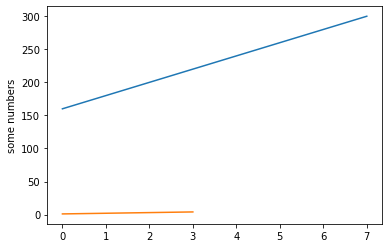

In [32]:
plt.plot(t_CLT)

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()